# Read the data

In [10]:
# Building a decison tree from scratch
# https://www.youtube.com/watch?v=y6DmpG_PtN0&list=PLPOTBrypY74xS3WD0G_uzqPjCQfU6IRK-&index=1

In [11]:
# Pruning a decision tree
# https://www.youtube.com/watch?v=u4kbPtiVVB8

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
def load_data(filepath):
    """Load data.

    Extended description of function.

    Args:
        filename (str): filepath

    Returns:
        dataset (np.ndarray(Nx8)): dataset

    """
    File_data = np.loadtxt(filepath, dtype=int)
    return File_data
    


In [48]:
wifi_data=load_data("wifi_db/clean_dataset.txt")
dataset=wifi_data
dataset

array([[-64, -56, -61, ..., -82, -81,   1],
       [-68, -57, -61, ..., -85, -85,   1],
       [-63, -60, -60, ..., -85, -84,   1],
       ...,
       [-62, -59, -46, ..., -87, -88,   4],
       [-62, -58, -52, ..., -90, -85,   4],
       [-59, -50, -45, ..., -88, -87,   4]])

In [51]:
def purity_check(dataset):
    """
    Determines whether the split data is pure. If pure, then this is a leaf node, else call find split to find next split factor
    Args:
        dataset (np.array)
    Returns:
        Boolean (True or False)
    """
    purity=np.unique(dataset[:, -1])
    if len(purity)==1:
        return True
    else:
        return False

In [52]:
purity_check(dataset)


False

In [22]:
def leaf_classify(dataset):
    """
    Determines the label for each leaf
    
    Args: Data (np.array)
    
    Returns y_label i.e. [Room = 1,2,3 or 4]
    
    """
    
    unique_values,values_count=np.unique(dataset[:, -1],return_counts=True)
    max_index=np.argmax(values_count)
    return unique_values[max_index]
    

In [23]:
leaf_classify(dataset)

1

In [24]:
def potential_split_intervals(dataset):
    """
    Finds inbetween splits between each wifi signal array for potential split value
    
    Args: Dataset (np.array) (2000 X 8)
    
    Returns Split values (np.array) 
    
    
    """
    split_values_dict={} # create a dictonary to store all potential split values
    n_columns=dataset.shape[1] # get the number of columns (i.e. wifi signals) to get split values for each column (i.e. wifi signal)

    for x_index in range(0,n_columns-1,1):
        split_values_dict[x_index]=[]
        values_in_col_x=dataset[:,x_index]
        unique_values_in_col_x=np.unique(values_in_col_x) # np.unique produces a sorted list of unique values



        for x in range(1,len(unique_values_in_col_x),1): #start at range 1 because you are calculating midpoint of x and x-1
            midpoint=(unique_values_in_col_x[x]+unique_values_in_col_x[x-1])/2
            split_values_dict[x_index].append(midpoint)

    return split_values_dict


In [26]:
potential_splits=potential_split_intervals(wifi_data)
potential_splits
# potential_splits

{0: [-73.5,
  -72.5,
  -71.5,
  -70.5,
  -69.5,
  -68.5,
  -67.5,
  -66.5,
  -65.5,
  -64.5,
  -63.5,
  -62.5,
  -61.5,
  -60.5,
  -59.5,
  -58.5,
  -57.5,
  -56.5,
  -55.5,
  -54.5,
  -53.5,
  -52.5,
  -51.5,
  -50.5,
  -49.5,
  -48.5,
  -47.5,
  -46.5,
  -45.5,
  -44.5,
  -43.5,
  -42.5,
  -41.5,
  -40.5,
  -39.5,
  -38.5,
  -37.5,
  -36.5,
  -35.5,
  -34.5,
  -30.5,
  -26.5,
  -23.5,
  -20.5,
  -19.5,
  -18.5,
  -17.5,
  -16.5,
  -15.5,
  -14.5,
  -13.5,
  -12.5,
  -11.5,
  -10.5],
 1: [-72.0,
  -69.5,
  -68.5,
  -67.0,
  -65.5,
  -64.5,
  -63.5,
  -62.5,
  -61.5,
  -60.5,
  -59.5,
  -58.5,
  -57.5,
  -56.5,
  -55.5,
  -54.5,
  -53.5,
  -52.5,
  -51.5,
  -50.5,
  -49.5,
  -48.5,
  -47.5,
  -46.5,
  -45.5],
 2: [-72.0,
  -70.5,
  -69.5,
  -68.5,
  -67.5,
  -66.5,
  -65.5,
  -64.5,
  -63.5,
  -62.5,
  -61.5,
  -60.5,
  -59.5,
  -58.5,
  -57.5,
  -56.5,
  -55.5,
  -54.5,
  -53.5,
  -52.5,
  -51.5,
  -50.5,
  -49.5,
  -48.5,
  -47.5,
  -46.5,
  -45.5,
  -44.5,
  -43.5,
  -42.5,
  -41.5,

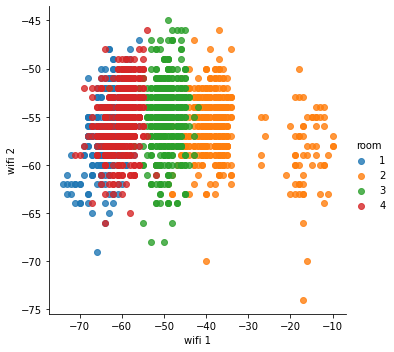

In [9]:
# Data visualization
import pandas as pd
import seaborn as sns
Data=pd.read_csv("wifi_db/clean_dataset.txt",sep="\t" ,header=None)
Data.columns=['wifi 1','wifi 2','wifi 3','wifi 4', 'wifi 5','wifi 6','wifi 7', 'room']

sns.lmplot(data=Data,x='wifi 1',y='wifi 2',hue='room',fit_reg=False)
# plt.vlines(x=potential_splits[0],ymin=-75,ymax=-40)

In [10]:
def actual_splits(dataset,split_column,split_value):
    """
    Splits the dataset into a left and right branch
    
    Args:
        dataset:(np.array): of size 2000*8
        split_column (int): Column index which specifies the column to split the data
        split_value (float): Float value which specifies the number at which the wifi signal data points should be split
    
    return: left_branch_data,right_branch_data
    
    """
    split_column_values=dataset[:,split_column] 
    left_split=dataset[split_column_values<=split_value]
    right_split=dataset[split_column_values>split_value]
    
    return left_split,right_split

In [27]:
split_col=2
split_val=-54
left_dataset,right_dataset=actual_splits(dataset,split_col,split_val)


                   

In [59]:
left_dataset

array([[-64, -56, -61, ..., -82, -81,   1],
       [-68, -57, -61, ..., -85, -85,   1],
       [-63, -60, -60, ..., -85, -84,   1],
       ...,
       [-60, -55, -54, ..., -86, -88,   4],
       [-62, -53, -55, ..., -87, -87,   4],
       [-56, -55, -54, ..., -79, -79,   4]])

In [29]:
right_dataset

array([[-61, -56, -53, ..., -84, -91,   1],
       [-65, -50, -51, ..., -80, -79,   1],
       [-63, -48, -51, ..., -77, -82,   1],
       ...,
       [-62, -59, -46, ..., -87, -88,   4],
       [-62, -58, -52, ..., -90, -85,   4],
       [-59, -50, -45, ..., -88, -87,   4]])

In [30]:
def entropy(dataset):
    """
    Takes in a dataset and calculates the entropy
    
    Args: dataset (np.array
    
    returns: entropy (float)
    
    """
    target_variable = dataset[:, -1]
    count_i=np.unique(target_variable, return_counts=True)[1]

    probability_i=count_i/np.sum(count_i)
    entropy=-np.sum(probability_i*np.log2(probability_i))
    
    
    
    
    return entropy

In [32]:
entropy_calc=entropy(dataset)
entropy_calc

2.0

In [33]:
def remainder_Left_Right(left_dataset,right_dataset):
    """
    Calculates the remainder on the left and right of the leaf nodes.
    
    Args:
        Left_dataset (np.array)
        Right_dataset (np.array)
    
    returns Entropy remainder i,e  H(left) and H(right)
    
    
    
    """
    n = len(left_dataset) + len(right_dataset)
    p_left = len(left_dataset) / n
    p_right = len(right_dataset) / n

    overall_entropy =  (p_left * entropy(left_dataset) 
                      + p_right * entropy(right_dataset))
    
    return overall_entropy

In [34]:
remainder=remainder_Left_Right(left_dataset,right_dataset)
print(f' The Remainder is {remainder}')

 The Remainder is 1.733321597244652


In [43]:
def calculate_optimal_split(dataset,potential_splits):
    
    
    overall_entropy = 9999
    for x_index in potential_splits:
        
        for value in potential_splits[x_index]:
            left_split,right_split = actual_splits(dataset, split_column=x_index, split_value=value)
            current_overall_entropy = remainder_Left_Right(left_split,right_split)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                optimal_split_column = x_index
                optimal_split_value = value
    
    return optimal_split_column, optimal_split_value
# def determine_best_split(data, potential_splits):
    
#     overall_entropy = 9999
#     for column_index in potential_splits:
#         for value in potential_splits[column_index]:
#             data_below, data_above = actual_splits(data, split_column=column_index, split_value=value)
#             current_overall_entropy = remainder_Left_Right(data_below, data_above)

#             if current_overall_entropy <= overall_entropy:
#                 overall_entropy = current_overall_entropy
#                 best_split_column = column_index
#                 best_split_value = value
    
#     return best_split_column, best_split_value

In [44]:
optimal_split_column, optimal_split_value=determine_best_split(dataset,potential_splits)
print(f'The optimal split column = is {optimal_split_column}')
print(f'The optimal split value = is {optimal_split_value}')

The optimal split column = is 0
The optimal split value = is -54.5



# Decision Tree algorthim

In [57]:
def decision_tree_learning(training_dataset,depth=0):
    """
        Algorithm 1 Decision Tree creating
    1: procedure decision tree learning(training dataset, depth)
    2: if all samples have the same label then
    3: return (a leaf node with this value, depth)
    4: else
    5: split← find split(training dataset)
    6: node← a new decision tree with root as split value
    7: l branch, l depth ← DECISION TREE LEARNING(l dataset, depth+1)
    8: r branch, r depth ← DECISION TREE LEARNING(r dataset, depth+1)
    9: return (node, max(l depth, r depth))
    10: end if
    11: end procedure
    
    Args:
         training_data_set: (np.array)
    
    """
    
    
    if purity_check(training_dataset)==True:
        return leaf_classify(training_dataset)
    
    else: 
        depth += 1

        #split← find split(training dataset)
        potential_splits=potential_split_intervals(training_dataset)
        optimal_split_column, optimal_split_value=calculate_optimal_split(training_dataset,potential_splits)
        
        #node← a new decision tree with root as split value
        left_dataset,right_dataset=actual_splits(training_dataset,optimal_split_column,optimal_split_value)
        
        question = "{} <= {}".format(optimal_split_column, optimal_split_value)
        sub_tree = {question: []}

        l_branch = decision_tree_learning(left_dataset, depth)
        r_branch= decision_tree_learning(right_dataset, depth)
        
        sub_tree[question].append(l_branch)
        sub_tree[question].append(r_branch)
        
        return sub_tree
        
    


In [58]:
tree = decision_tree_learning(dataset)
pprint(tree)

{'0 <= -54.5': [{'4 <= -59.5': [{'3 <= -55.5': [{'2 <= -55.5': [1,
                                                                {'6 <= -85.5': [{'4 <= -62.5': [{'5 <= -85.5': [{'6 <= -89.5': [3,
                                                                                                                                4]},
                                                                                                                1]},
                                                                                                4]},
                                                                                1]}]},
                                                {'1 <= -50.5': [3,
                                                                {'6 <= -84.5': [1,
                                                                                3]}]}]},
                                {'4 <= -56.5': [{'3 <= -58.5': [4, 3]}, 4]}]},
                {'0 <= -44.5': [{'4 <= -70.5':